In [1]:
import nltk
#nltk.download('stopwords') 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import csv
import matplotlib.pyplot as plt

In [2]:
def fetch_file(filename):                                           #function to fetch a file and return a list of reviews.
    try:
        with open(filename, encoding="utf8") as f:
            return [line.rstrip() for line in f if line.rstrip()]
    except IOError:
        print("Error File Does Not Exist")
        return []



def stopW(ls):                                                     #function to remove stop words and return a list of tokens
    word_tokens = word_tokenize(ls) 
  
    filtered_sentence = [w for w in word_tokens if not w in stop_wordset] 
  
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_wordset: 
            filtered_sentence.append(w)
            #Tokens.append(w)
    return filtered_sentence




def vector(ls):                                                 #function to create a systematic vocabulary
    vectorizer = CountVectorizer(min_df=0, lowercase=False)     #from sklearn.feature_extraction.text import CountVectorizer
    vectorizer.fit(ls)
    return list(vectorizer.vocabulary_)




def check(ls):                                                  #function that returns the polarity of a passed sentence
    positive_score = 0
    negative_score = 0


    for i in range(0,len(ls)):
        if [ls[i]] in positive_list:
            positive_score = positive_score +1

        
        if [ls[i]] in negative_list:
            negative_score = negative_score +1
        
        else:
            continue
        
    
    try:
        positive_polarity = (positive_score/(positive_score + negative_score))
        print("Positive Polarity: ", positive_polarity)
        negative_polarity = (negative_score/(positive_score + negative_score))
        print("Negative Polarity: ", negative_polarity)
        if(positive_polarity > negative_polarity):
            print(1)
            return 1
        else:
            print(0)
            return 0

    except ZeroDivisionError:
        print("Neutral Line")
        return 'x'

## Positive Lexicons
The Positive Vocabulary.

In [3]:
positive_list = []

with open('pos_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        positive_list.append(row)

print(positive_list)
csvFile.close()

[['a+'], ['abound'], ['abounds'], ['abundance'], ['abundant'], ['accessable'], ['accessible'], ['acclaim'], ['acclaimed'], ['acclamation'], ['accolade'], ['accolades'], ['accommodative'], ['accomodative'], ['accomplish'], ['accomplished'], ['accomplishment'], ['accomplishments'], ['accurate'], ['accurately'], ['achievable'], ['achievement'], ['achievements'], ['achievible'], ['acumen'], ['adaptable'], ['adaptive'], ['adequate'], ['adjustable'], ['admirable'], ['admirably'], ['admiration'], ['admire'], ['admirer'], ['admiring'], ['admiringly'], ['adorable'], ['adore'], ['adored'], ['adorer'], ['adoring'], ['adoringly'], ['adroit'], ['adroitly'], ['adulate'], ['adulation'], ['adulatory'], ['advanced'], ['advantage'], ['advantageous'], ['advantageously'], ['advantages'], ['adventuresome'], ['adventurous'], ['advocate'], ['advocated'], ['advocates'], ['affability'], ['affable'], ['affably'], ['affectation'], ['affection'], ['affectionate'], ['affinity'], ['affirm'], ['affirmation'], ['affi

## Negative Lexicons
The Negative Vocabulary.

In [4]:
negative_list = []

with open('neg_words.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        negative_list.append(row)

print(negative_list)
csvFile.close()

[['ï»¿2-faced'], ['2-faces'], ['abnormal'], ['abolish'], ['abominable'], ['abominably'], ['abominate'], ['abomination'], ['abort'], ['aborted'], ['aborts'], ['abrade'], ['abrasive'], ['abrupt'], ['abruptly'], ['abscond'], ['absence'], ['absent-minded'], ['absentee'], ['absurd'], ['absurdity'], ['absurdly'], ['absurdness'], ['abuse'], ['abused'], ['abuses'], ['abusive'], ['abysmal'], ['abysmally'], ['abyss'], ['accidental'], ['accost'], ['accursed'], ['accusation'], ['accusations'], ['accuse'], ['accuses'], ['accusing'], ['accusingly'], ['acerbate'], ['acerbic'], ['acerbically'], ['ache'], ['ached'], ['aches'], ['achey'], ['aching'], ['acrid'], ['acridly'], ['acridness'], ['acrimonious'], ['acrimoniously'], ['acrimony'], ['adamant'], ['adamantly'], ['addict'], ['addicted'], ['addicting'], ['addicts'], ['admonish'], ['admonisher'], ['admonishingly'], ['admonishment'], ['admonition'], ['adulterate'], ['adulterated'], ['adulteration'], ['adulterier'], ['adversarial'], ['adversary'], ['adve

In [5]:
print("No. of words in positive lexicon:",len(positive_list))
print("No. of words in negative lexicon:",len(negative_list))

No. of words in positive lexicon: 2006
No. of words in negative lexicon: 4787


## StopWords
#### Common words that don't have any relevance.
The set of stop words had to be adjusted according to our need in the project.

In [6]:
stop_wordset = set(stopwords.words('english'))
stop_wordset.add('.')
stop_wordset.add(',')
stop_wordset.add('!')
stop_wordset.remove('not')
stop_wordset.remove('nor')
stop_wordset

{'!',
 ',',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 

In [7]:
print("No. of stop words:",len(stop_wordset))

No. of stop words: 180


# Main

In [8]:
Lines = fetch_file('Unlablled_data.txt')             #fn call to fetch file.
len(Lines)

1000

In [9]:
pos_count = 0                                            #Initialising variables for keeping count of the postive, negative
neg_count = 0                                            # and neutral reviews.
neutral_count = 0
   
for i in range(0,len(Lines)):                                  
    Lines[i] = Lines[i].lower()                                #Lowercasing the text
    stp_lines = stopW(Lines[i])                                #Stop words removal fn
    vec_lines = vector(stp_lines)                              #Vocabulary creation
    print(vec_lines)
    pole = check(vec_lines)                                    #Polarity is ditermined
    
    if(pole == 'x'):
        neutral_count = neutral_count + 1
    
    if(pole == 1):
        pos_count = pos_count + 1
    
    else:
        neg_count = neg_count +1
    
    print("*"*30)
    

['way', 'plug', 'us', 'unless', 'go', 'converter']
Neutral Line
******************************
['good', 'case', 'excellent', 'value']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['great', 'jawbone']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['tied', 'charger', 'conversations', 'lasting', '45', 'minutes', 'major', 'problems']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['mic', 'great']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['jiggle', 'plug', 'get', 'line', 'right', 'decent', 'volume']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['several', 'dozen', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['razr', 'owner', 'must']
Neutral Line
******************************
['needless', 'say', 'wasted', 'money']
Posi

Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['phone', 'loads', 'super']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['product', 'costs', 'much', 'one', 'expect', 'work', 'far', 'better', 'greater', 'ease', 'thing']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['made', 'sturdy']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['worked', 'great']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['ear', 'buds', 'play', 'music', 'one']
Neutral Line
******************************
['dont', 'waste', 'money']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['order']
Neutral Line
******************************
['plan', 'use', 'car', 'forget']
Neutral Line
******************************
['found', 'product', 'waaay', 'big']
Neutral Line
******************************
['best', 've', 'found', '

['audio', 'quality', 'poor']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['igo', 'chargers', 'tips', 'really', 'great']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['file', 'browser', 'offers', 'options', 'one', 'needs', 'handsfree', 'great']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['superb', 'phone', 'great', 'network']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['connected', 'wife', 'bluetooth', 'motorola', 'hs85', 'phone', 'worked', 'like', 'charm', 'whether', 'pocket', 'case']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['put', 'latest', 'os', '5g', 'likes', 'slow', 'crawl', 'lock', 'every']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['recognizes', 'phone', 'storage', 'device']
Neutral Line
******************************
['like', 'loud', 'buzzing', 'override

['absolutel', 'junk']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['one', 'work', 'either']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['battery', 'life', 'real', 'good']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['returned', 'hours', 'later']
Neutral Line
******************************
['great', 'item']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['waste', 'money']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['love', 'headset']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['not', 'drain', 'player', 'may', 'also', 'potentially', 'fry']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['worked', 'perfectly']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['unreliable', 'giving']
Positive Polarity:  0.0

Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['bad', 'fit', 'way', 'big']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['definitely', 'not', 'good']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['awesome', 'device']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['waste', 'money']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['ordered', 'motorola', 'data', 'cable', 'got', 'well', 'finished', 'working', 'product']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['love', 'phone']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['looking', 'headset', 'long', 'time', 've', 'got', 'could', 'happier']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['ll', 'drivng', 'along', 'headset', 'starts', 'ringing', 'reason']
Neut

Negative Polarity:  0.0
1
******************************
['screen', 'size', 'big', 'key', 'pad', 'lit', 'well', 'enough', 'camera', 'quality', 'excellent', 'phone']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['really', 'nothing', 'bad', 'say', 'headset']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['glad', 'found', 'product', 'amazon', 'hard', 'find', 'high', 'priced']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['portable', 'works']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['colleague', 'get', 'great', 'reception', 'little', 'expensive', 'performance']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['even', 'fully', 'charged', 'went', 'bed', 'turned', 'blue', 'tooth', 'wi', 'fi', 'noticed', 'left', 'morning']
Neutral Line
******************************
['ve', 'also', 'problems', 'phone', 'reading', 'me

['shifting', 'bubbling', 'peeling', 'not', 'even', 'scratch', 'nothing', 'could', 'happier', 'new', 'one', 'droid']
Positive Polarity:  0.3333333333333333
Negative Polarity:  0.6666666666666666
0
******************************
['worst', 'software', 'ever', 'used', 'could', 'give', 'zero', 'stars', 'would']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['trying', 'make', 'call', 'exercise', 'frustration']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['case', 'flimsy', 'piece', 'plastic', 'front', 'side', 'protection', 'whatsoever']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['jabra', 'earset', 'happy', 'sound', 'quality', 'especially', 'outgoing', 'better']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['love', 'camera', 'really', 'pretty', 'good', 'quality']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['than

Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['im', 'surprised', 'good', 'quality', 'car', 'charger', 'not', 'much', 'reviews']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['fabulous']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['however', 'bt', 'headsets', 'currently', 'not', 'good', 'real', 'time', 'games', 'like', 'first', 'person', 'shooters', 'since', 'audio', 'delay', 'messes']
Positive Polarity:  0.4
Negative Polarity:  0.6
0
******************************
['used', 'bitpim', 'free', 'program', 'find', 'internet', 'transfer', 'data', 'phone', 'the', 'price', 'cable', 'excellent']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['disappointing', 'accessory', 'good', 'manufacturer']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['performed', 'awful', 'muffled', 'tinny', 'incoming', 'sound', 'severe', 'echo

Neutral Line
******************************
['span', 'hour', 'two', 'people', 'exclaim', 'whoa', 'new', 'phone', 'tv']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['always', 'used', 'corded', 'headsets', 'freedom', 'wireless', 'helpful']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['case', 'passed', 'one', 'year', 'mark', 'shows', 'signs', 'wear', 'functional']
Neutral Line
******************************
['leather', 'nice', 'soft', 'fit', 'tight', 'cut', 'face', 'good', 'shape']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['everything', 'need', 'could', 'ask']
Neutral Line
******************************
['receiving', 'using', 'product', 'days', 'broke']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['product', 'great', 'makes', 'working', 'lot', 'easier', 'go', 'copier', 'waiting', 'hold', 'something']
Positive Polarity:  1.0
Negative Polarit

Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['good', 'works', 'fine']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['price', 'great', 'deal']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['great', 'price']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['wind', 'completely', 'useless']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['yes', 'shiny', 'front', 'side', 'love']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['not', 'work']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['first', 'thought', 'grtting', 'good', 'deal', '44', 'plugged', 'phone', 'v3c', 'razr']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['reception', 'headset', 'excellent']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
***********

Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['love', 'able', 'use', 'one', 'headset', 'land', 'line', 'cell']
Positive Polarity:  1.0
Negative Polarity:  0.0
1
******************************
['problem', 'ear', 'loops', 'made', 'weak', 'material', 'break', 'easily']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['not', 'nearly', 'good', 'looking', 'amazon', 'picture', 'makes', 'look']
Positive Polarity:  0.5
Negative Polarity:  0.5
0
******************************
['despite', 'flaws', 'case', 'exceptional', 'quality', 'well', 'worth', 'additional', 'costs', 'owning', 'official', 'oem', 'product']
Positive Polarity:  0.75
Negative Polarity:  0.25
1
******************************
['stupid']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['hear', 'driving', 'car', 'usually', 'even', 'put', 'loudest', 'setting']
Neutral Line
******************************
['seller', 'shipped', 'quickly'

Negative Polarity:  0.5
0
******************************
['painful', 'ear']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['lasted', 'one', 'day', 'blew']
Neutral Line
******************************
['disappointed']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['kind', 'flops', 'around']
Neutral Line
******************************
['screen', 'get', 'smudged', 'easily', 'touches', 'ear', 'face']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['piece', 'junk', 'lose', 'calls', 'phone']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['item', 'not', 'match', 'picture']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['thing', 'disappoint', 'infra', 'red', 'port', 'irda']
Positive Polarity:  0.0
Negative Polarity:  1.0
0
******************************
['not', 'answer', 'calls', 'unit', 'never', 'worked']
Positive Polarity

In [10]:
print("No. of Neutral Reviews:", neutral_count)
print("No. of Positive Reviews:", pos_count)
print("No. of Negative Reviews:", neg_count)

No. of Neutral Reviews: 130
No. of Positive Reviews: 474
No. of Negative Reviews: 526


In [11]:
positive_polarity = (pos_count/(pos_count + neg_count))
print("Positive Polarity: ", positive_polarity)
negative_polarity = (neg_count/(pos_count + neg_count))
print("Negative Polarity: ", negative_polarity)

percent_pos = (pos_count/(pos_count + neg_count + neutral_count) * 100)
percent_neg = (neg_count/(pos_count + neg_count + neutral_count) * 100)
percent_neutral = (neutral_count/(pos_count + neg_count + neutral_count) * 100)
print(int(percent_neg),"%", int(percent_pos),"%", int(percent_neutral),"%")


Positive Polarity:  0.474
Negative Polarity:  0.526
46 % 41 % 11 %


# Graphical Representaion of Stats

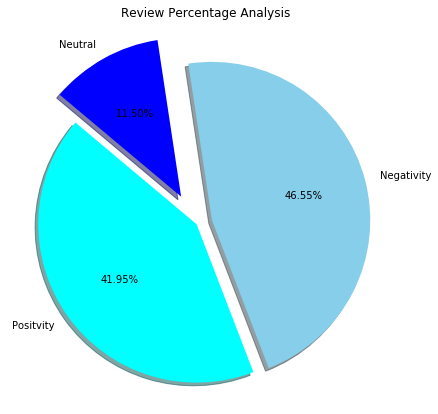

In [12]:
labels = 'Positvity', 'Negativity', 'Neutral'
sizes = [percent_pos, percent_neg, percent_neutral]
explode = (0, 0.1, 0.2) 
colours = ['cyan', 'skyblue', 'blue']

fig1, ax1 = plt.subplots()
fig = plt.gcf()  ####################################################
fig.set_size_inches(7,7)
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Review Percentage Analysis")
plt.show()

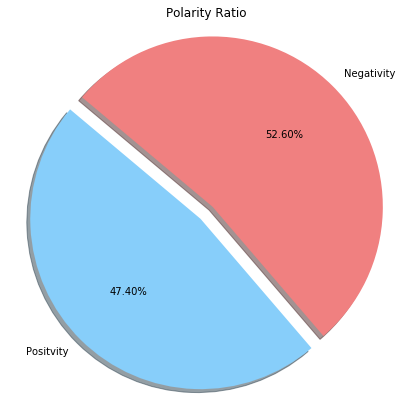

In [13]:
labels = 'Positvity', 'Negativity'
sizes = [(positive_polarity*100), (negative_polarity*100)]
explode = (0, 0.1)  
colours = ['lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
fig = plt.gcf() ########################################################
fig.set_size_inches(7,7)
ax1.pie(sizes, colors=colours, explode=explode, labels=labels, autopct='%1.2f%%',  shadow=True, startangle=140)
ax1.axis('equal') 
ax1.set_title("Polarity Ratio")

plt.show()